# En jämförelse mellan bunden och rörlig ränta

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas.tseries.offsets import *

rates_org = pd.read_csv("swedish_interest_rates.csv", 
            decimal=',',
            index_col=0,
            skiprows=[0,1],
            names=["Date", "5y", "2y", "3m"],
            parse_dates=True, infer_datetime_format=True).sort_index()
print(rates_org.sample(10).sort_index().to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>5y</th>
      <th>2y</th>
      <th>3m</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1990-03-07</th>
      <td>15.25</td>
      <td>15.50</td>
      <td>15.50</td>
    </tr>
    <tr>
      <th>1993-02-10</th>
      <td>12.25</td>
      <td>12.25</td>
      <td>12.75</td>
    </tr>
    <tr>
      <th>1993-02-16</th>
      <td>12.00</td>
      <td>11.75</td>
      <td>12.75</td>
    </tr>
    <tr>
      <th>1993-11-01</th>
      <td>9.50</td>
      <td>9.25</td>
      <td>10.50</td>
    </tr>
    <tr>
      <th>1996-03-20</th>
      <td>9.60</td>
      <td>8.70</td>
      <td>8.75</td>
    </tr>
    <tr>
      <th>2006-02-06</th>
      <td>4.20</td>
      <td>3.56</td>
      <td>3.40</td>
    </tr>
    <tr>
      <th>2006-06-26</th>
      <td>4.58</td>
      <td>3.85</td>
      <td>3.90

In [3]:
rates = rates_org.asfreq("MS", method="pad")
print(rates.sample(10).sort_index().to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>5y</th>
      <th>2y</th>
      <th>3m</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1990-06-01</th>
      <td>14.50</td>
      <td>14.50</td>
      <td>13.95</td>
    </tr>
    <tr>
      <th>1999-01-01</th>
      <td>5.65</td>
      <td>5.10</td>
      <td>4.85</td>
    </tr>
    <tr>
      <th>2004-01-01</th>
      <td>5.60</td>
      <td>4.60</td>
      <td>4.40</td>
    </tr>
    <tr>
      <th>2004-11-01</th>
      <td>4.85</td>
      <td>3.90</td>
      <td>3.65</td>
    </tr>
    <tr>
      <th>2005-09-01</th>
      <td>3.74</td>
      <td>2.97</td>
      <td>3.15</td>
    </tr>
    <tr>
      <th>2006-04-01</th>
      <td>4.29</td>
      <td>3.60</td>
      <td>3.65</td>
    </tr>
    <tr>
      <th>2007-09-01</th>
      <td>5.23</td>
      <td>4.90</td>
      <td>5.15</td>
 

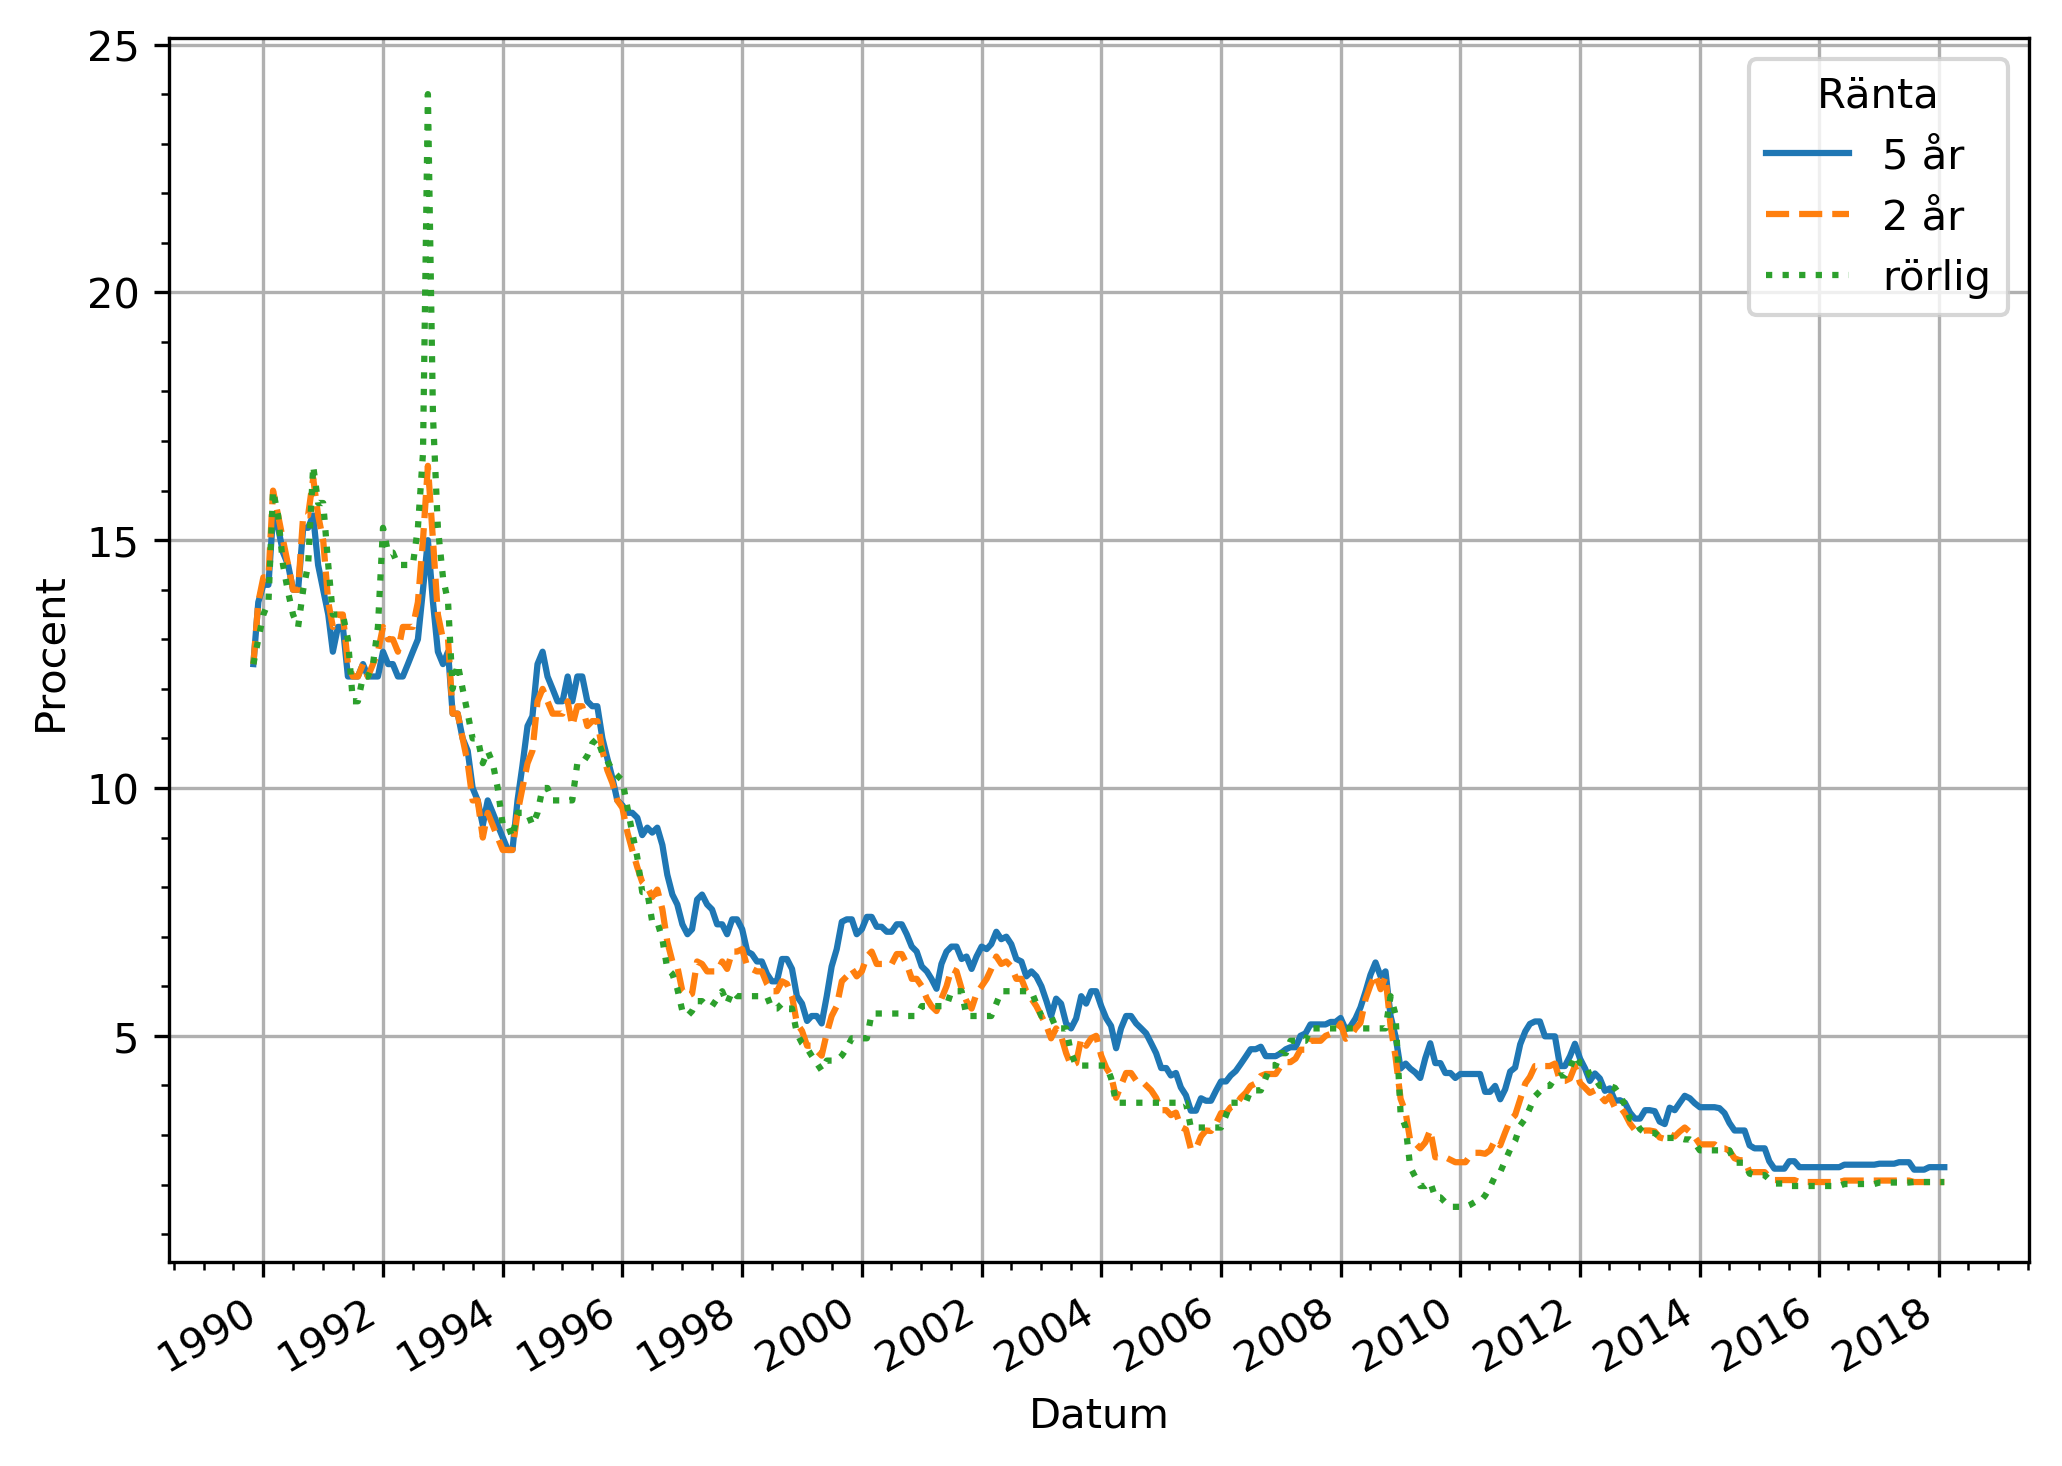

In [4]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=300, figsize=(8,6))

ax_rate = fig.add_subplot(1,1,1)

ax_rate.plot_date(rates.index.to_pydatetime(), rates["5y"], '-', label="5 år")
ax_rate.plot_date(rates.index.to_pydatetime(), rates["2y"], '--', label="2 år")
ax_rate.plot_date(rates.index.to_pydatetime(), rates["3m"], ':', label="rörlig")

ax_rate.grid()
ax_rate.legend(title="Ränta")
ax_rate.set_ylabel("Procent")
ax_rate.set_xlabel("Datum")

# Set tick labels every second year, starting from 1990
every_second_year = pd.date_range('1990-01-01', periods=29, freq='YS')[::2]
every_second_year = every_second_year.to_pydatetime()

ax_rate.xaxis.set_ticks(every_second_year)
ax_rate.minorticks_on()
fig.autofmt_xdate()

In [5]:
print("5y: {:.2f}".format(rates["5y"].loc["1991-07-01"]))
print("3m: {:.2f}".format(rates["3m"].loc["1991-07-01":"1996-06-30":3].mean()))

5y: 12.25
3m: 11.96


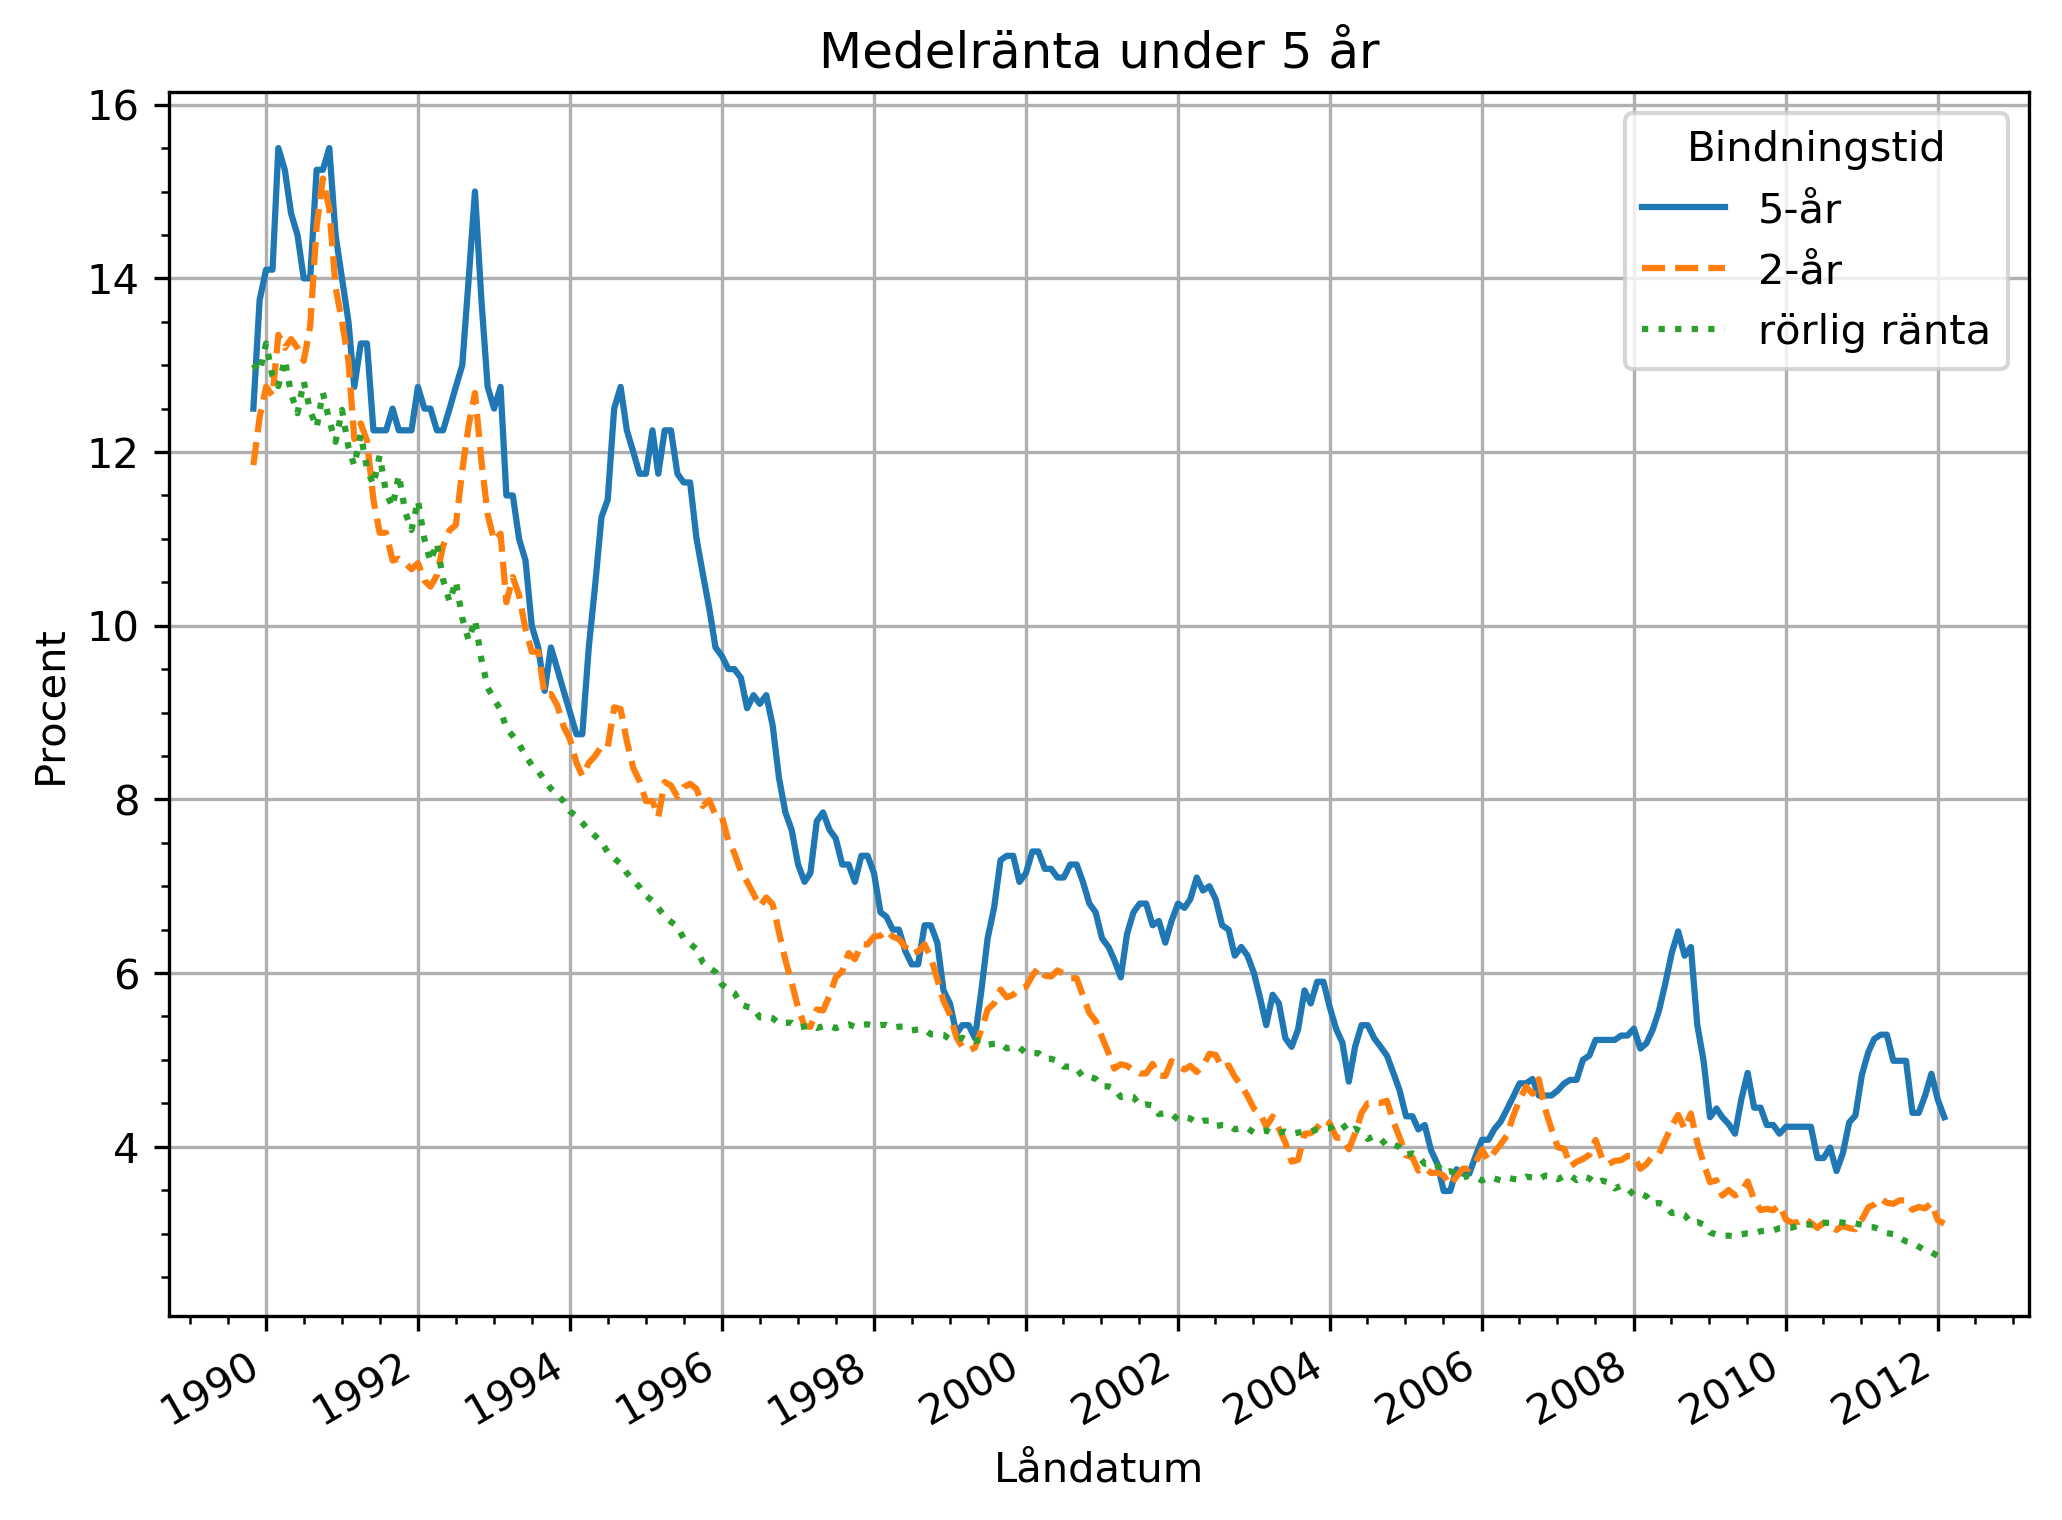

In [6]:
five_mean = []
two_5ymean = []
free_5ymean = []

# Iterate over possible times to bind for 5 years
# (note that we end 6 years back to allow for 2-year comparison)
starting_dates_5y = rates.index[:-6*12]
for start_idx, start_date in enumerate(starting_dates_5y):
    five_mean.append(rates["5y"].loc[start_date])
    free_5ymean.append(rates["3m"].iloc[start_idx:start_idx+12*5:3].mean())
    # 2 year need some special care since 6 years is not really 5
    # so do mean calculation manually to get the weighting right
    two_year = rates["2y"].iloc[start_idx:start_idx+12*6:24]
    two_5ymean.append((two_year.iloc[0] * 2 + two_year.iloc[1] * 2 + two_year.iloc[2]) / 5)

fig = plt.figure(dpi=300, figsize=(8,6))

ax_cost = fig.add_subplot(1,1,1)

ax_cost.plot_date(starting_dates_5y.to_pydatetime(), five_mean, '-', label="5-år")
ax_cost.plot_date(starting_dates_5y.to_pydatetime(), two_5ymean, '--', label="2-år")
ax_cost.plot_date(starting_dates_5y.to_pydatetime(), free_5ymean, ':', label="rörlig ränta")

ax_cost.set_title("Medelränta under 5 år")
ax_cost.legend(title="Bindningstid")
ax_cost.set_ylabel("Procent")
ax_cost.set_xlabel("Låndatum")
ax_cost.grid()

every_second_year = pd.date_range('1990-01-01', periods=24, freq='YS')[::2]
every_second_year = every_second_year.to_pydatetime()

ax_cost.xaxis.set_ticks(every_second_year)
ax_cost.minorticks_on()
fig.autofmt_xdate()

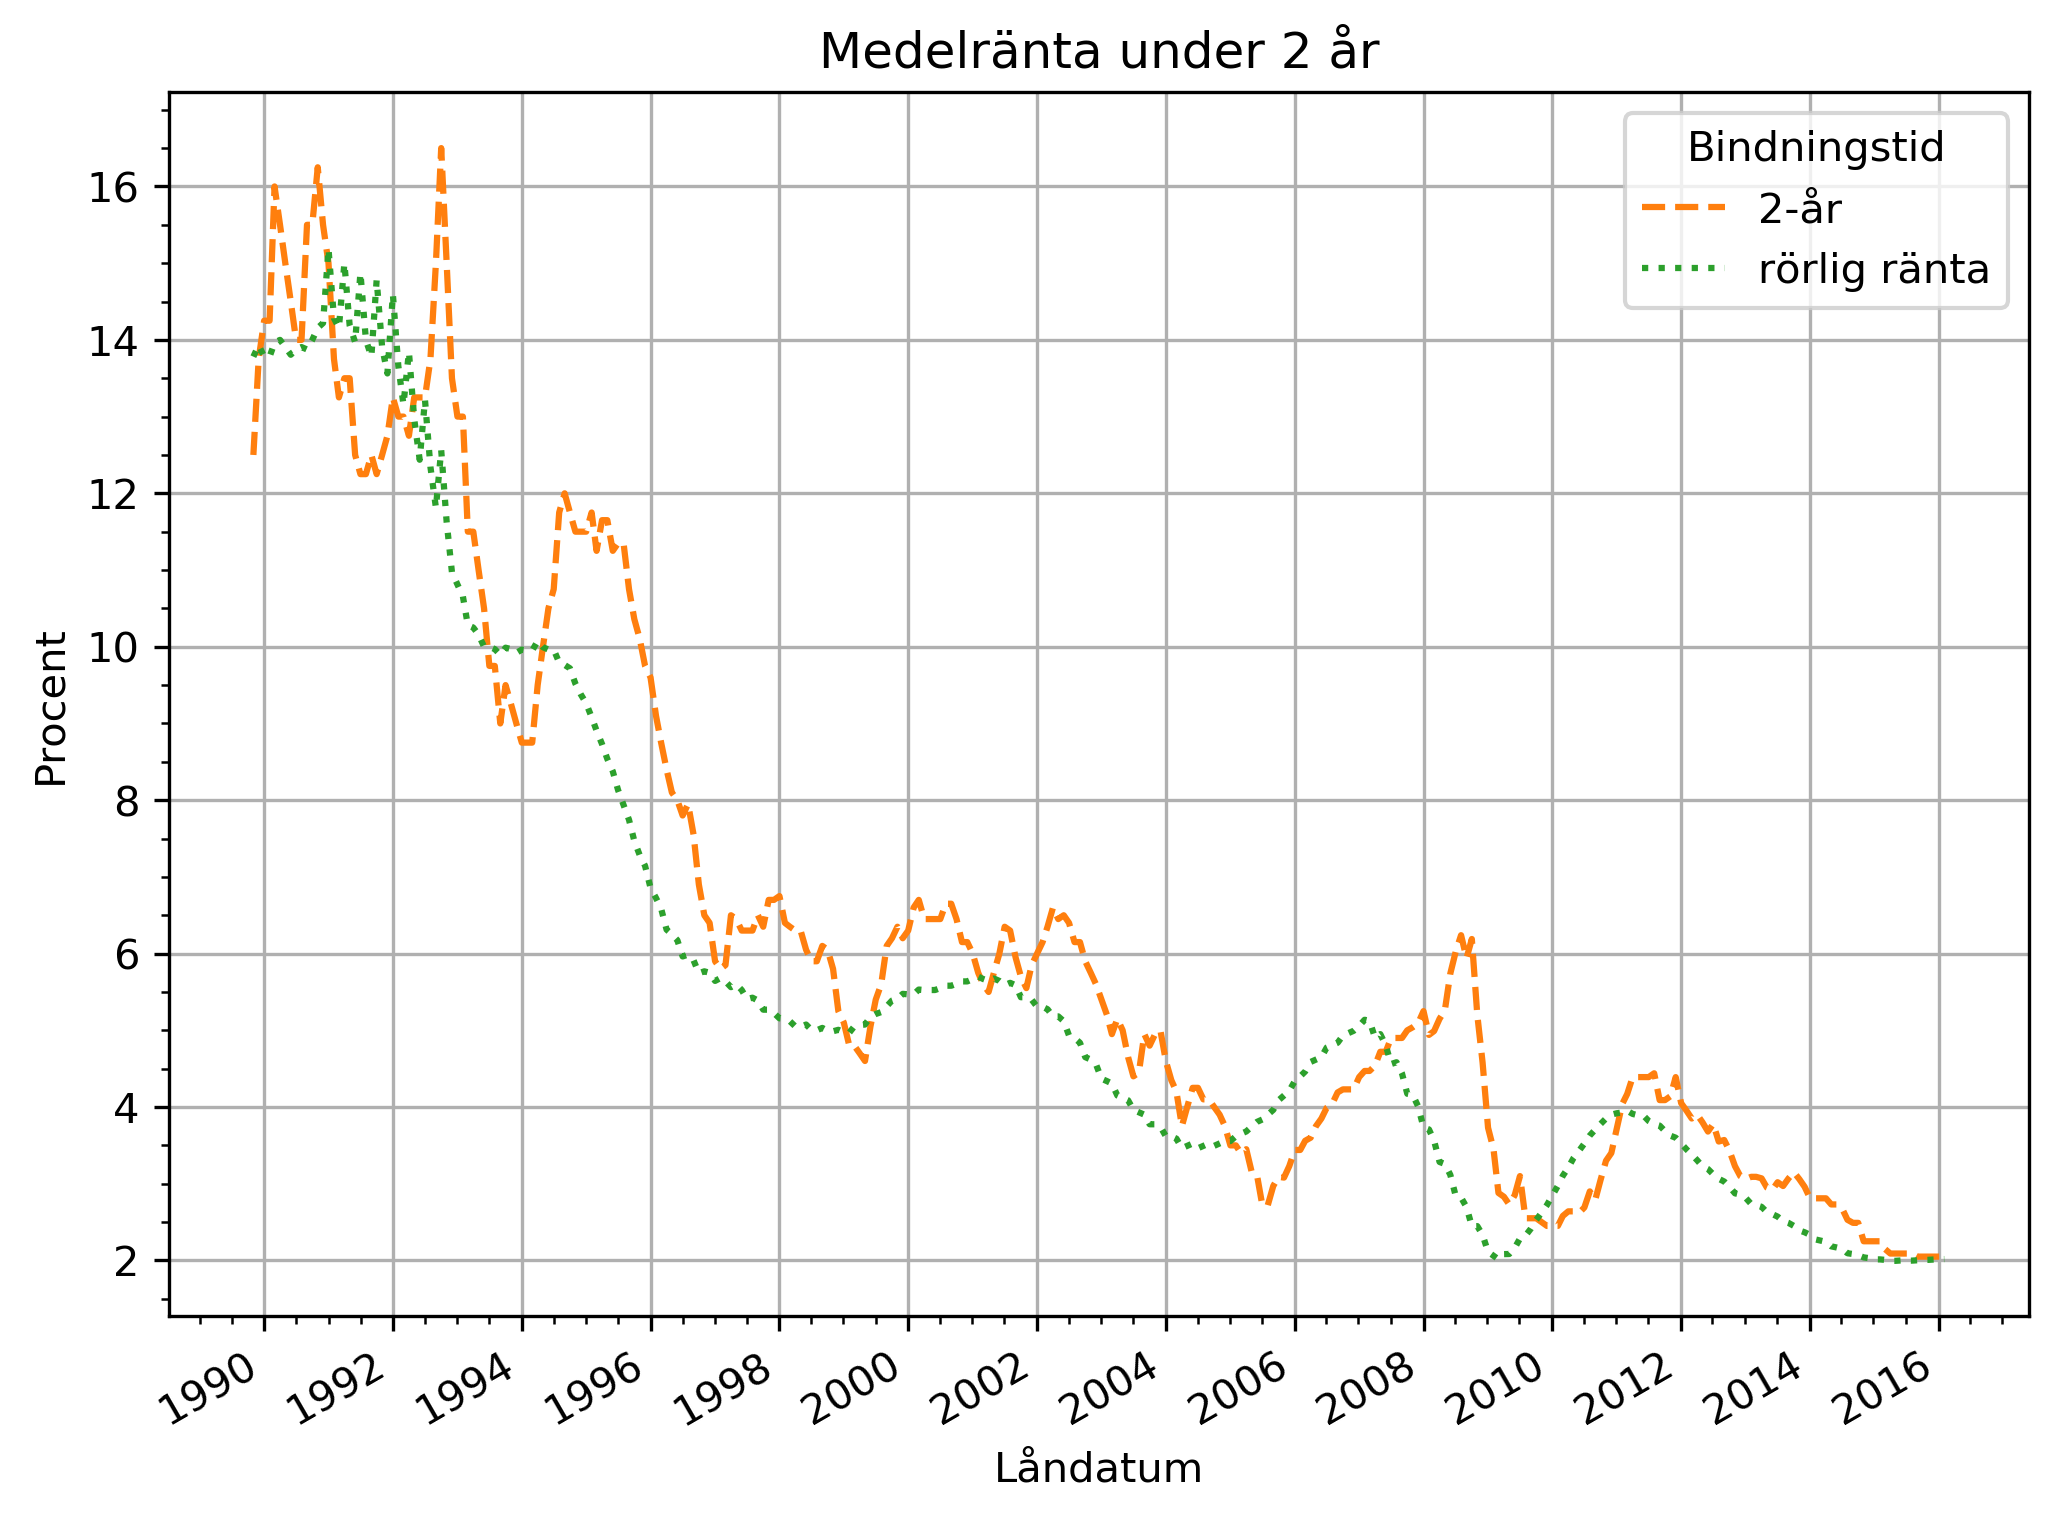

In [7]:
two_mean = []
free_2ymean = []

starting_dates_2y = rates.index[:-2*12]
for start_idx, start_date in enumerate(starting_dates_2y):
    two_mean.append(rates["2y"].loc[start_date])
    free_2ymean.append(rates["3m"].iloc[start_idx:start_idx+12*2:3].mean())

fig = plt.figure(dpi=300, figsize=(8,6))

ax_cost = fig.add_subplot(1,1,1)

# Keep the same colors by specifying the colors to omit C0
ax_cost.plot_date(starting_dates_2y.to_pydatetime(), two_mean, '--C1', label="2-år")
ax_cost.plot_date(starting_dates_2y.to_pydatetime(), free_2ymean, ':C2', label="rörlig ränta")

ax_cost.set_title("Medelränta under 2 år")
ax_cost.legend(title="Bindningstid")
ax_cost.set_ylabel("Procent")
ax_cost.set_xlabel("Låndatum")
ax_cost.grid()

every_second_year = pd.date_range('1990-01-01', periods=27, freq='YS')[::2]
every_second_year = every_second_year.to_pydatetime()

ax_cost.xaxis.set_ticks(every_second_year)
ax_cost.minorticks_on()
fig.autofmt_xdate()

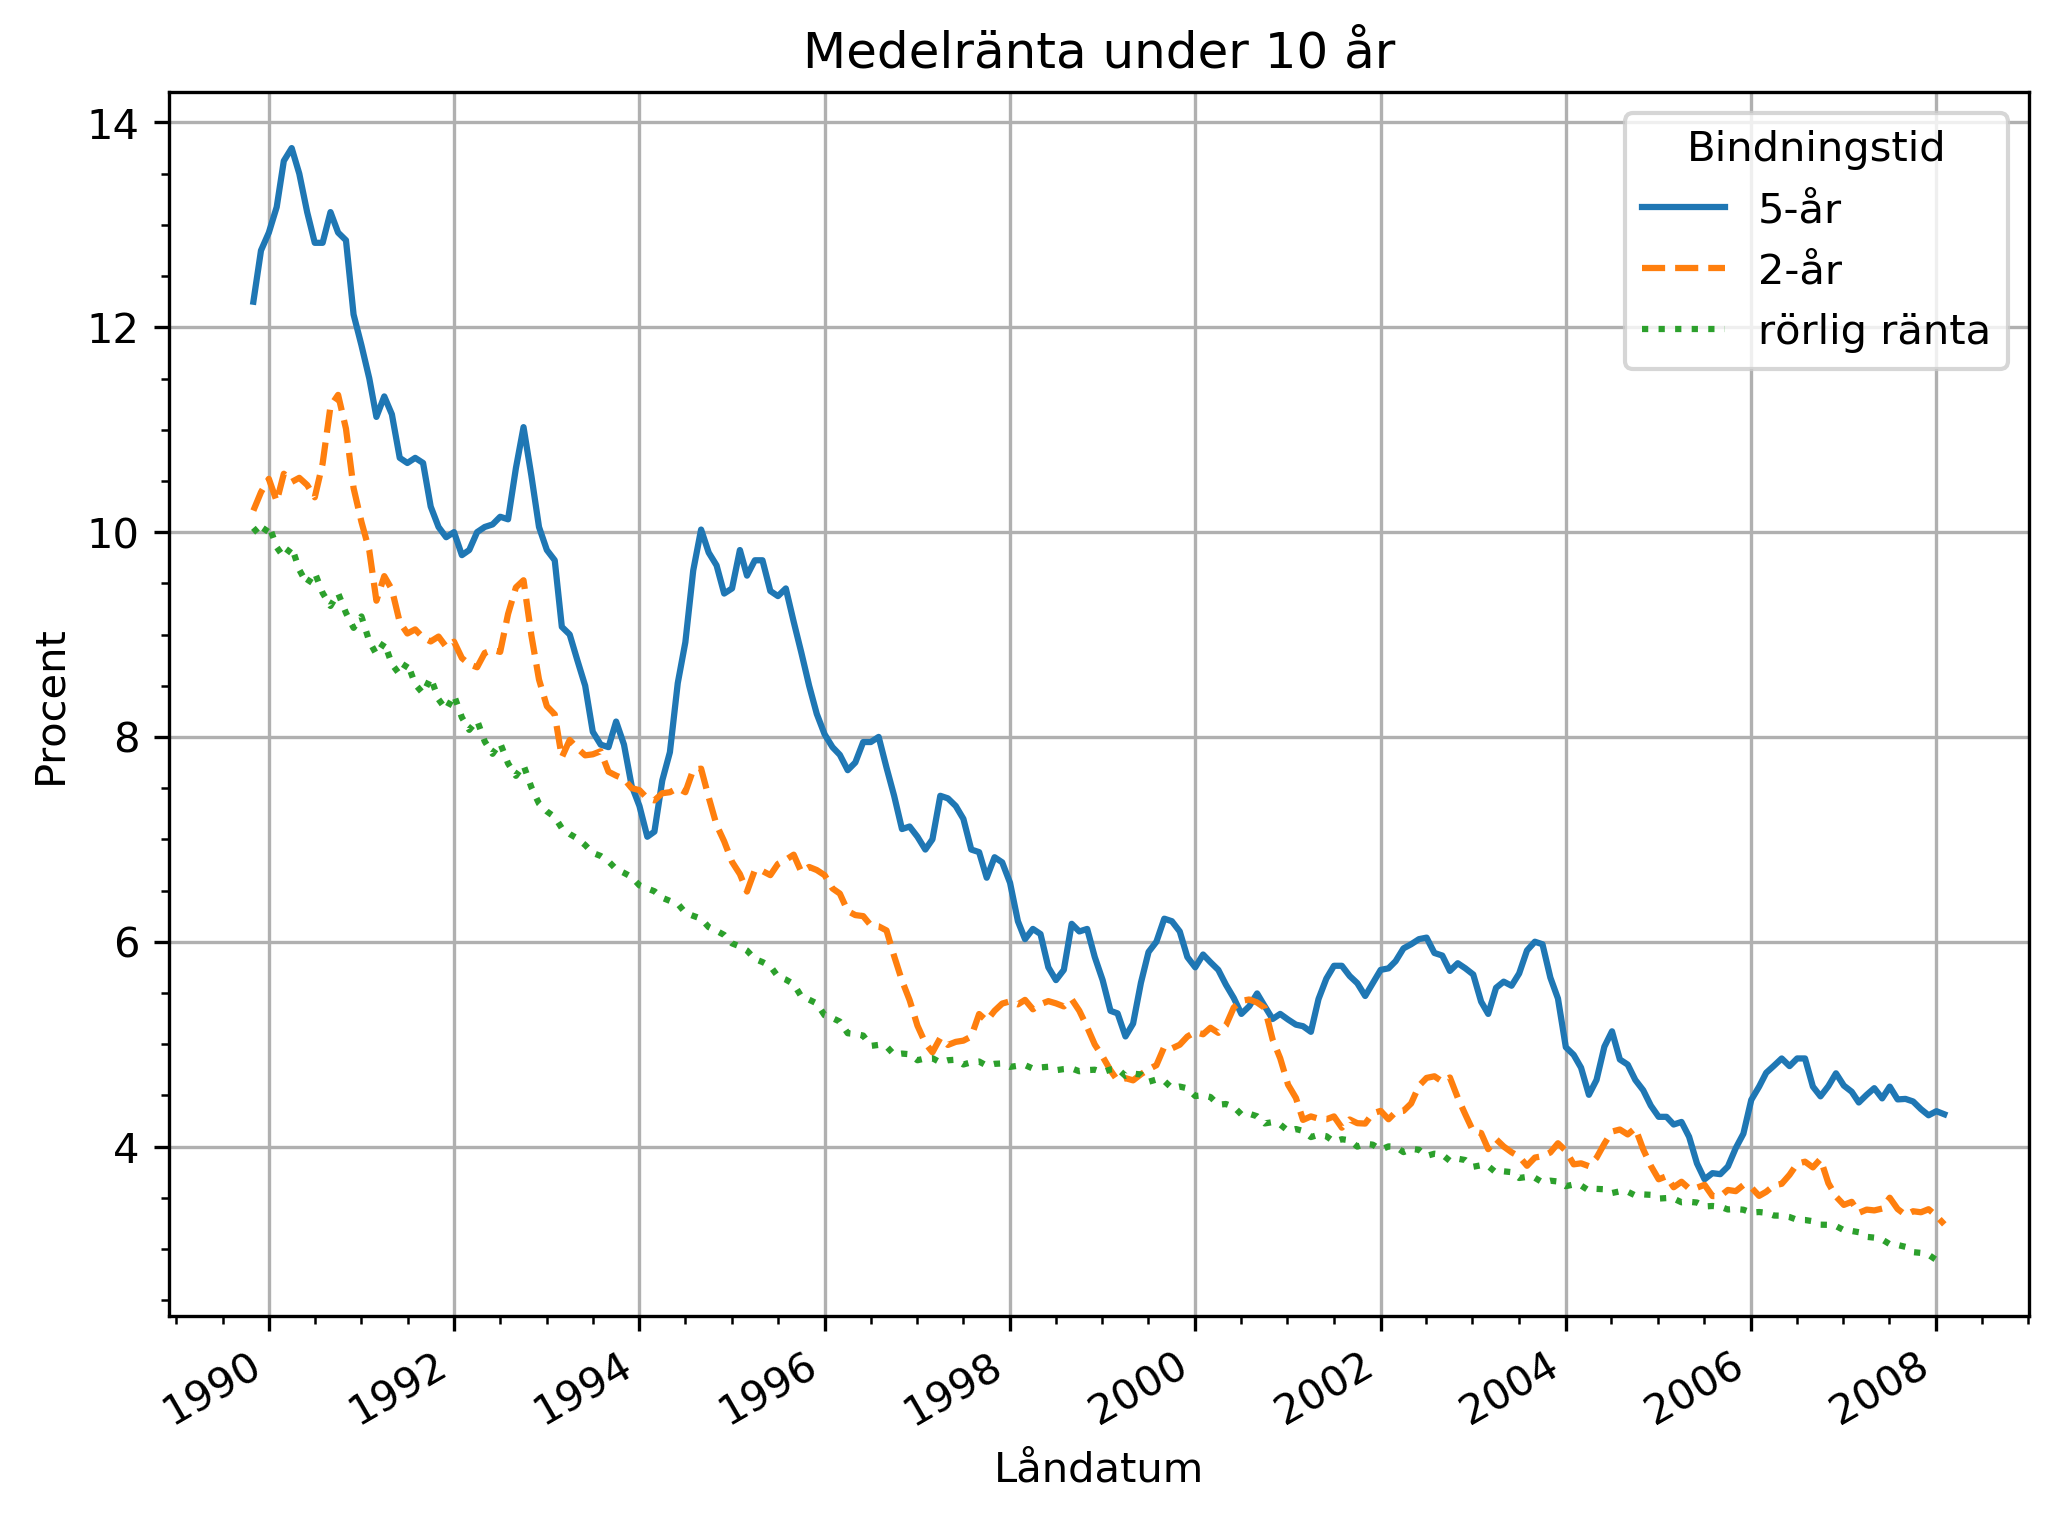

In [8]:
five_10ymean = []
two_10ymean = []
free_10ymean = []

# Iterate over possible times to bind for 10 years
starting_dates_10y = rates.index[:-10*12]
for start_idx, start_date in enumerate(starting_dates_10y):
    five_10ymean.append(rates["5y"].iloc[start_idx:start_idx+12*10:60].mean())
    free_10ymean.append(rates["3m"].iloc[start_idx:start_idx+12*10:3].mean())
    two_10ymean.append(rates["2y"].iloc[start_idx:start_idx+12*10:24].mean())

fig = plt.figure(dpi=300, figsize=(8,6))

ax_cost = fig.add_subplot(1,1,1)

ax_cost.plot_date(starting_dates_10y.to_pydatetime(), five_10ymean, '-', label="5-år")
ax_cost.plot_date(starting_dates_10y.to_pydatetime(), two_10ymean, '--', label="2-år")
ax_cost.plot_date(starting_dates_10y.to_pydatetime(), free_10ymean, ':', label="rörlig ränta")

ax_cost.set_title("Medelränta under 10 år")
ax_cost.legend(title="Bindningstid")
ax_cost.set_ylabel("Procent")
ax_cost.set_xlabel("Låndatum")
ax_cost.grid()

every_second_year = pd.date_range('1990-01-01', periods=19, freq='YS')[::2]
every_second_year = every_second_year.to_pydatetime()

ax_cost.xaxis.set_ticks(every_second_year)
ax_cost.minorticks_on()
fig.autofmt_xdate()